# setup

> Fill in a module description here

In [ ]:
#| default_exp setup

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
## Correspondence annotator

!pip install pixelstitch ipywidgets ipympl -qq



In [ ]:
!pip install ipython

In [ ]:
!wget https://github.com/ducha-aiki/pixelstitch/archive/refs/heads/master.zip

!unzip master

In [ ]:
%matplotlib widget

In [ ]:
import os
rootdir = 'pixelstitch-master/sample_project'
pairs = os.listdir(rootdir)
img_pairs_list = []
for p in pairs:
    if p == '.DS_Store':
        continue
    cur_dir = os.path.join(rootdir, p)
    img_pairs_list.append((os.path.join(cur_dir, '01.png'),
                           os.path.join(cur_dir, '02.png'),
                           os.path.join(cur_dir, 'corrs.txt')))

print (img_pairs_list)



[('pixelstitch-master/sample_project/petrzin/01.png', 'pixelstitch-master/sample_project/petrzin/02.png', 'pixelstitch-master/sample_project/petrzin/corrs.txt'), ('pixelstitch-master/sample_project/ministry/01.png', 'pixelstitch-master/sample_project/ministry/02.png', 'pixelstitch-master/sample_project/ministry/corrs.txt')]


In [ ]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'webagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [ ]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"


In [ ]:
# %matplotlib widget
from IPython.display import display
from IPython.core.display import HTML
from pixelstitch.core import *


CA = CorrespondenceAnnotator(img_pairs_list, save_on_next=True)
#display(HTML("<style>.container { width:95% !important; }</style>"))
#CA.start(figsize=(12,7))

In [ ]:
figsize=(15,8)
idx = 0
CA.state_dict['idx'] = 0
CA.load_pair_into_statedict(idx)


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


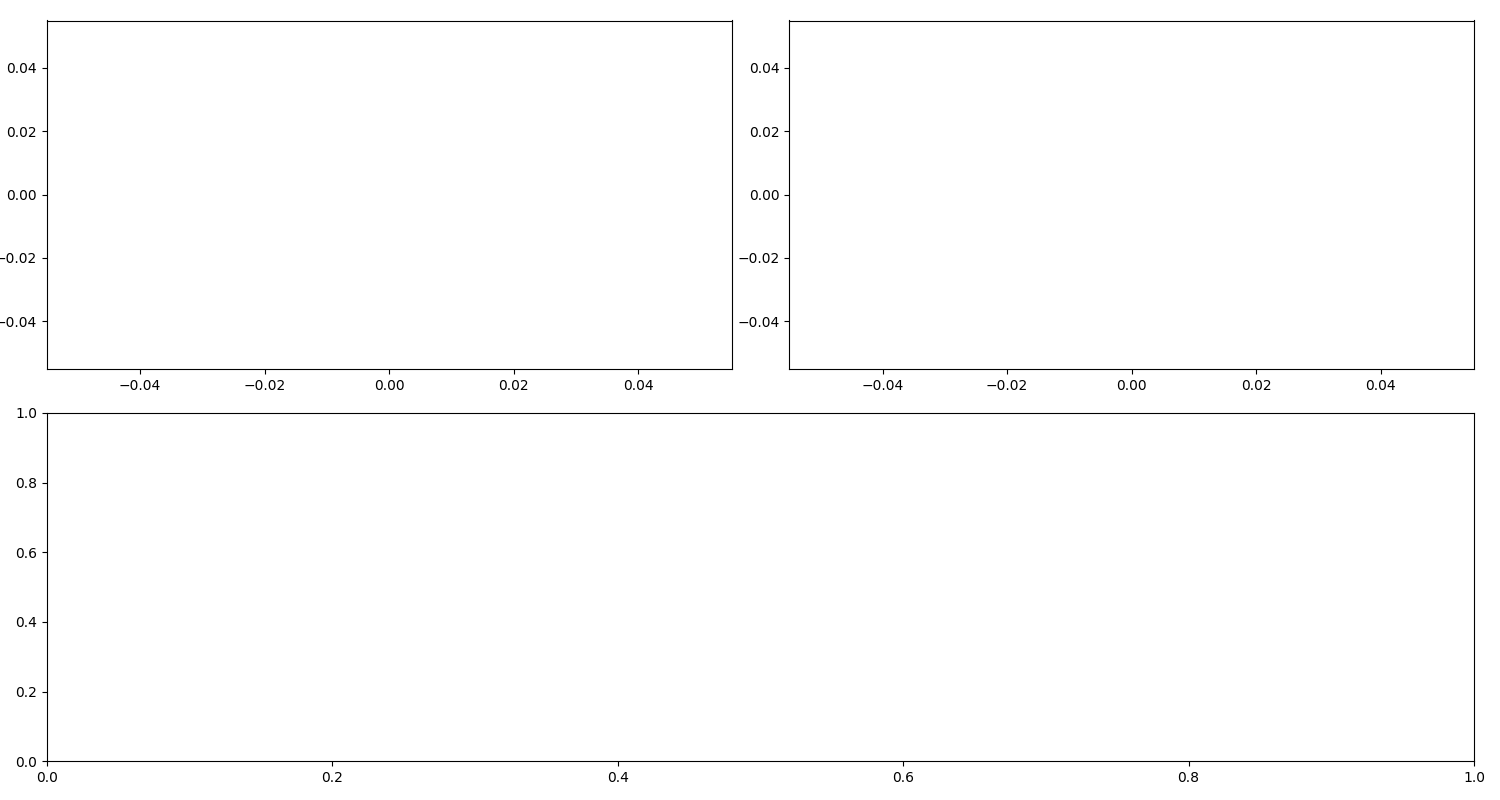

In [ ]:
CA.initialize_ui(figsize=figsize)

In [ ]:
import ipywidgets as wdg  # Using the ipython notebook widgets
from ipywidgets import Button, HBox, VBox, Layout
import matplotlib.pyplot as plt

In [ ]:
plt.subplots(2, 2)

<IPython.core.display.Javascript object>

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

In [ ]:

fig, ((CA.ax1, CA.ax2), (CA.ax3, CA.ax4)) = plt.subplots(2, 2, figsize=figsize)




<IPython.core.display.Javascript object>

In [ ]:
CA.figure = fig

In [ ]:
gs = CA.ax3.get_gridspec()


In [ ]:
CA.ax3.remove()
CA.ax4.remove()
CA.ax3 = fig.add_subplot(gs[1, :])

In [ ]:
plt.tight_layout()
CA.ln1, = CA.ax1.plot([], [], 'x', markersize=10, color='r')
CA.ln2, = CA.ax2.plot([], [], 'x', markersize=10, color='r')
CA.hp1, = CA.ax1.plot([], [], '-o', markersize=10, color='m')
CA.hp2, = CA.ax2.plot([], [], '-o', markersize=10, color='m')

CA.texts1 = [CA.ax1.text([], [], '', fontsize=12) for i in range(CA.max_pts)]
CA.texts2 = [CA.ax2.text([], [], '', fontsize=12) for i in range(CA.max_pts)]
#self.fig.tight_layout()

<IPython.core.display.Javascript object>

In [ ]:
CA.next_button = wdg.Button(description="Next")
CA.prev_button = wdg.Button(description="Prev")
CA.save_button = wdg.Button(description="Save points")
CA.clahe_button = wdg.Button(description='CLAHE')
CA.homo_pick_button = wdg.Button(description='Pick 4 points for homography')
CA.reset_view_button = wdg.Button(description='ResetView')
CA.show_model_button = wdg.Button(description='ShowModel')
CA.showcrossval_button = wdg.Button(description='NextCorrsValPoint')
CA.showcrossvalall_button = wdg.Button(description='NextCorrsValAll')
CA.model_selector = wdg.Dropdown(description='Model', options=CA.model_types,
              value=CA.model_types[0], layout=Layout(width='10'))
CA.img_selector = wdg.Dropdown(description='Tilt image', options=[0,1],
              value=0, layout=Layout(width='10'))

CA.homo_pick_button.on_click(CA.pick_homo)
CA.next_button.on_click(CA.next_pair)
CA.prev_button.on_click(CA.prev_pair)
CA.save_button.on_click(CA.save_current_pts)
CA.clahe_button.on_click(CA.show_clahed)
CA.show_model_button.on_click(CA.show_model)
CA.showcrossval_button.on_click(CA.show_crossval_single)
CA.showcrossvalall_button.on_click(CA.show_crossval_all)
CA.reset_view_button.on_click(CA.reset_view)

In [ ]:
display(
    wdg.VBox(
        (wdg.HBox(
            (CA.showcrossval_button,
            CA.showcrossvalall_button,
            CA.show_model_button,
            CA.save_button,
            CA.prev_button,
            CA.next_button,
            CA.clahe_button,
            CA.model_selector)),
        #self.vertical_tilt_slider,
        wdg.HBox((CA.homo_pick_button,
                 CA.reset_view_button))
        #self.img_selector
        )))

In [ ]:

CA.show_current_pair()
CA.callback_ref = CA.figure.canvas.mpl_connect('button_press_event',
                                                lambda event: self.process_user_click(event))

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()